In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

### Training Data

In [2]:
datadir = 'C:/Users/LightSpeed/Light Speed/Deep Learning/Brain Tumor Classification MRI/Training'
categories = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
train_images = []
train_labels = []
for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_array = cv2.resize(img_array,(70,70) )
        train_images.append(img_array)
        train_labels.append(categories.index(category))

In [3]:
len(train_images),len(train_labels)

(2870, 2870)

In [4]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_images.shape[1:], train_labels.shape

((70, 70, 3), (2870,))

In [5]:
train_images = train_images/255.0

In [6]:
train_labels

array([0, 0, 0, ..., 3, 3, 3])

### Testing Data

In [7]:
datadir = os.path.normpath('C:/Users/LightSpeed/Light Speed/Deep Learning/Brain Tumor Classification MRI/Testing')
categories = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
test_images = []
test_labels = []
for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_array = cv2.resize(img_array,(70,70) )
        test_images.append(img_array)
        test_labels.append(categories.index(category))

In [8]:
len(test_images),len(test_labels)

(394, 394)

In [9]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_images.shape[1:], test_labels.shape

((70, 70, 3), (394,))

In [10]:
test_images = test_images/255.0

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from tensorflow.python.keras.layers import Conv2D,MaxPooling2D
from tensorflow.python.keras import regularizers

from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

In [12]:
weight_decay = 1e-4
model = Sequential()

#1st Convolutional Layer
model.add(Conv2D(32,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay) ,input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#2nd Convolutional Layer
model.add(Conv2D(64,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#3rd Convolutional Layer
model.add(Conv2D(128,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#4th Convolutional Layer
model.add(Conv2D(256,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#5th Convolutional Layer
model.add(Conv2D(512,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#6th Convolutional Layer
model.add(Conv2D(1024,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#Fully connected layer
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4,activation='softmax'))

In [13]:
sgd = keras.optimizers.SGD(0.1)

model.compile(optimizer=sgd,
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
model.fit(train_images,train_labels,
         epochs=100,
         validation_data=(test_images,test_labels))

Epoch 1/100
90/90 [==============================] - 6s 63ms/step - loss: 1.5486 - accuracy: 0.3962 - val_loss: 2.3251 - val_accuracy: 0.2056
Epoch 2/100
90/90 [==============================] - 4s 41ms/step - loss: 1.3054 - accuracy: 0.4777 - val_loss: 2.8805 - val_accuracy: 0.2665
Epoch 3/100
90/90 [==============================] - 4s 40ms/step - loss: 1.2534 - accuracy: 0.4934 - val_loss: 3.6216 - val_accuracy: 0.2614
Epoch 4/100
90/90 [==============================] - 4s 41ms/step - loss: 1.2604 - accuracy: 0.4850 - val_loss: 2.3601 - val_accuracy: 0.3096
Epoch 5/100
90/90 [==============================] - 4s 40ms/step - loss: 1.2340 - accuracy: 0.5098 - val_loss: 3.6501 - val_accuracy: 0.2107
Epoch 6/100
90/90 [==============================] - 4s 39ms/step - loss: 1.1679 - accuracy: 0.5495 - val_loss: 3.0507 - val_accuracy: 0.2919
Epoch 7/100
90/90 [==============================] - 3s 39ms/step - loss: 1.1551 - accuracy: 0.5505 - val_loss: 2.4722 - val_accuracy: 0.3122
Epoch 

### Tuning the base CNN Model

In [37]:
def build_model(hp):
    weight_decay = 1e-4
    model = Sequential()
    model.add(Conv2D(32,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay) ,input_shape=train_images.shape[1:]))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    
    for i in range(5,hp.Int('Number_Of_Conv_Layers',min_value=6,max_value=12)):
        model.add(Conv2D((2**i),(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding=hp.Choice('padding'+str(i),['valid','same'])))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        #model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(hp.Choice('Dropout'+str(i),[0.1,0.2,0.3,0.4,0.5])))
        
        
    model.add(Flatten())
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(4,activation='softmax'))
    
    model.compile(optimizer=sgd,
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
    
    return model

In [38]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory=os.path.normpath('C:/'),
    project_name='Hyp_cnn_kaggle')

In [21]:
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\client\session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [39]:
tuner.search(train_images, train_labels,epochs=100,validation_data=(test_images,test_labels))

Trial 5 Complete [00h 09m 49s]
val_accuracy: 0.2664974530537923

Best val_accuracy So Far: 0.2808798551559448
Total elapsed time: 10h 48m 21s
INFO:tensorflow:Oracle triggered exit


In [42]:
best_model = tuner.get_best_models(1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 70, 70, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 70, 70, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 33, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 33, 33, 32)        0

In [47]:
def build_model2(hp):
    weight_decay = 1e-4
    model = Sequential()
    model.add(Conv2D(32,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay) ,input_shape=train_images.shape[1:]))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    
    for i in range(5,hp.Int('Number_Of_Conv_Layers',min_value=6,max_value=12)):
        model.add(Conv2D((2**i),(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding=hp.Choice('padding'+str(i),['valid','same'])))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(hp.Choice('Dropout'+str(i),[0.1,0.2,0.3,0.4,0.5])))
        
        
    model.add(Flatten())
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(4,activation='softmax'))
    
    model.compile(optimizer=sgd,
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
    
    return model

In [45]:
tuner2 = RandomSearch(
    build_model2,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory=os.path.normpath('C:/'),
    project_name='Hyp_cnn_kaggle2')

In [46]:
tuner2.search(train_images, train_labels,epochs=100,validation_data=(test_images,test_labels))

Trial 2 Complete [00h 02m 37s]
val_accuracy: 0.7335025668144226

Best val_accuracy So Far: 0.7715736031532288
Total elapsed time: 00h 05m 18s

Search: Running Trial #3

Hyperparameter    |Value             |Best Value So Far 
Number_Of_Conv_...|11                |8                 
padding5          |same              |same              
Dropout5          |0.5               |0.1               
padding6          |same              |valid             
Dropout6          |0.4               |0.1               
padding7          |valid             |valid             
Dropout7          |0.5               |0.1               



Traceback (most recent call last):
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\ops.py", line 1812, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_4/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](batch_normalization_4/cond/Identity)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\LightSpeed\anaconda3\envs\gpu\lib\site-packages\kerastuner\engine\hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-43-a871f64d5a58>", line 14, in build_model2
    model.add(MaxPooling2D(pool_size=(2,2)))
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packag

Invalid model 0/5


Traceback (most recent call last):
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\ops.py", line 1812, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_4/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](batch_normalization_4/cond/Identity)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\LightSpeed\anaconda3\envs\gpu\lib\site-packages\kerastuner\engine\hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-43-a871f64d5a58>", line 14, in build_model2
    model.add(MaxPooling2D(pool_size=(2,2)))
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packag

Invalid model 1/5


Traceback (most recent call last):
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\ops.py", line 1812, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_4/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](batch_normalization_4/cond/Identity)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\LightSpeed\anaconda3\envs\gpu\lib\site-packages\kerastuner\engine\hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-43-a871f64d5a58>", line 14, in build_model2
    model.add(MaxPooling2D(pool_size=(2,2)))
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packag

Invalid model 2/5


Traceback (most recent call last):
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\ops.py", line 1812, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_4/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](batch_normalization_4/cond/Identity)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\LightSpeed\anaconda3\envs\gpu\lib\site-packages\kerastuner\engine\hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-43-a871f64d5a58>", line 14, in build_model2
    model.add(MaxPooling2D(pool_size=(2,2)))
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packag

Invalid model 3/5


Traceback (most recent call last):
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\ops.py", line 1812, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_4/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](batch_normalization_4/cond/Identity)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\LightSpeed\anaconda3\envs\gpu\lib\site-packages\kerastuner\engine\hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-43-a871f64d5a58>", line 14, in build_model2
    model.add(MaxPooling2D(pool_size=(2,2)))
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packag

Invalid model 4/5
Invalid model 5/5


Traceback (most recent call last):
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\ops.py", line 1812, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_4/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](batch_normalization_4/cond/Identity)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\LightSpeed\anaconda3\envs\gpu\lib\site-packages\kerastuner\engine\hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-43-a871f64d5a58>", line 14, in build_model2
    model.add(MaxPooling2D(pool_size=(2,2)))
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packag

RuntimeError: Too many failed attempts to build model.

In [55]:
def build_model3(hp):
    try:
        weight_decay = 1e-4
        model = Sequential()
        model.add(Conv2D(32,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay) ,input_shape=train_images.shape[1:]))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.4))

        for i in range(5,hp.Int('Number_Of_Conv_Layers',min_value=6,max_value=12)):
            model.add(Conv2D((2**i),(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding=hp.Choice('padding'+str(i),['valid','same'])))
            model.add(Activation('relu'))
            model.add(BatchNormalization())
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Dropout(hp.Choice('Dropout'+str(i),[0.1,0.2,0.3,0.4,0.5])))


        model.add(Flatten())
        model.add(Dense(32,activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(4,activation='softmax'))

        model.compile(optimizer=sgd,
                 loss = 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
        return model
    except:
        weight_decay = 1e-4
        model = Sequential()
        model.add(Conv2D(32,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay) ,input_shape=train_images.shape[1:]))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.4))

        for i in range(5,hp.Int('Number_Of_Conv_Layers',min_value=6,max_value=12)):
            model.add(Conv2D((2**i),(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding=hp.Choice('padding'+str(i),['valid','same'])))
            model.add(Activation('relu'))
            model.add(BatchNormalization())
            #model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Dropout(hp.Choice('Dropout'+str(i),[0.1,0.2,0.3,0.4,0.5])))


        model.add(Flatten())
        model.add(Dense(32,activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(4,activation='softmax'))

        model.compile(optimizer=sgd,
                 loss = 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
        return model

In [56]:
tuner3 = RandomSearch(
    build_model3,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory=os.path.normpath('C:/'),
    project_name='Hyp_cnn_kaggle3')

In [57]:
tuner3.search(train_images, train_labels,epochs=100,validation_data=(test_images,test_labels))

Trial 10 Complete [00h 35m 58s]
val_accuracy: 0.25380709767341614

Best val_accuracy So Far: 0.7715736031532288
Total elapsed time: 02h 13m 38s
INFO:tensorflow:Oracle triggered exit


In [75]:
best_model = tuner3.get_best_models(1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 70, 70, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 70, 70, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 35, 35, 32)        0

In [76]:
best_model.evaluate(test_images,test_labels)

13/13 [==============================] - 0s 7ms/step - loss: 2.3654 - accuracy: 0.7716


[2.3654427528381348, 0.7715736031532288]

In [78]:
yprob_test = best_model.predict(test_images)
ypred_test = [np.argmax(i) for i in yprob_test]

[[ 22  41  30   7]
 [  1 113   1   0]
 [  0   0 105   0]
 [  0   4   6  64]]


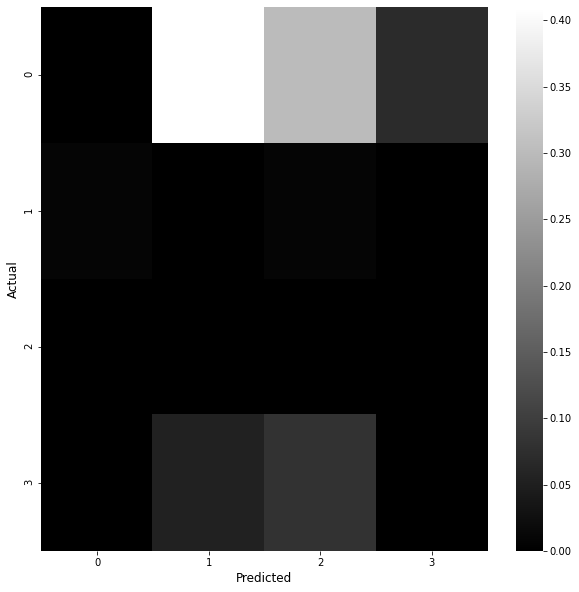

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mx = confusion_matrix(test_labels, ypred_test)
print(conf_mx)
plt.figure(figsize=(10,10))

row_sums = conf_mx.sum(axis=1,keepdims=True)
error_conf_mx = conf_mx/row_sums
np.fill_diagonal(error_conf_mx,0)

sns.heatmap(error_conf_mx, cmap=plt.cm.gray)
plt.xlabel('Predicted',size=12)
plt.ylabel('Actual',size=12)
plt.show()

### We see that most of the miss classification can be attributed to :
        Actual Class 0 -----> Model Predicting as Class 1

In [98]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, ypred_test))

              precision    recall  f1-score   support

           0       0.96      0.22      0.36       100
           1       0.72      0.98      0.83       115
           2       0.74      1.00      0.85       105
           3       0.90      0.86      0.88        74

    accuracy                           0.77       394
   macro avg       0.83      0.77      0.73       394
weighted avg       0.82      0.77      0.72       394



### Even from the Classification Report we can see that our model is doing a bad job at predicting Class 0 (f1=0.36) as compared to other Classes which the model is predicting pretty good

In [99]:
categories

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']